# FOOD DELIVERY TIME PREDICTION

# Importing Libraries

In [1086]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Importing Dataset

In [1087]:
data=pd.read_csv('train.csv')

In [1088]:
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


# Exploratory Data Analysis

In [1090]:
data.shape

(45593, 23)

In [1091]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          45593 non-null  object        
 3   Delivery_person_Ratings      45593 non-null  object        
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  45593 non-null  object        
 10  Time_Order_picked            45593 non-null  object        
 11  Weatherconditions            45593 non-nu

In [1092]:
data.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,year,month,day
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.0,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359,2022.0,4.254337,12.537692
std,8.185109,22.883647,7.335122,21.118812,0.839065,0.0,2.925565,9.587465
min,-30.905562,-88.366217,0.010000,0.010000,0.000000,2022.0,1.000000,2.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000,2022.0,3.000000,3.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000,2022.0,3.000000,13.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000,2022.0,5.000000,20.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000,2022.0,12.000000,31.000000


In [1093]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)', 'year',
       'month', 'day'],
      dtype='object')

In [1094]:
data.describe(exclude=np.number).T

,count,unique,top,freq,first,last
ID,45593,45593,0x4607,1,NaT,NaT
Delivery_person_ID,45593,1320,PUNERES01DEL01,67,NaT,NaT
Delivery_person_Age,45593,23,35,2262,NaT,NaT
Delivery_person_Ratings,45593,29,4.8,7148,NaT,NaT
Order_Date,45593,44,2022-03-15 00:00:00,1192,2022-01-03,2022-12-03
Time_Orderd,45593,177,NaN,1731,NaT,NaT
Time_Order_picked,45593,193,21:30:00,496,NaT,NaT
Weatherconditions,45593,7,conditions Fog,7654,NaT,NaT
Road_traffic_density,45593,5,Low,15477,NaT,NaT
Type_of_order,45593,4,Snack,11533,NaT,NaT


# Checking for null values 

In [1095]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
year                           0
month                          0
day                            0
dtype: int64

Check if the data contains NaN values in form of string 

In [1096]:
#Explore each column
for column in data.columns:
    print(column)
    print(data[column].value_counts())
    print("------------------------------------")

ID
0x4607     1
0x1f3e     1
0xe251     1
0x3f31     1
0x4a78     1
          ..
0xc3f1     1
0x5db7     1
0x1985     1
0xceda     1
0x5fb2     1
Name: ID, Length: 45593, dtype: int64
------------------------------------
Delivery_person_ID
PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: Delivery_person_ID, Length: 1320, dtype: int64
------------------------------------
Delivery_person_Age
35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: Delivery_person_Age, dtype: int64
------------------------------------
Delivery_person_Ratings
4.8     

In [1097]:
# from datetime import datetime 
# data["Order_Date"] = pd.to_datetime(data.Order_Date)

# data['year'] = data['Order_Date'].dt.year 
# data['month'] = data['Order_Date'].dt.month 
# data["day"]=data["Order_Date"].dt.day
# data["month"].value_counts()

# Convert  'NaN'  into  np.nan and then count null values

In [1098]:
def convert_nan(data):
    data.replace('NaN' , float(np.nan) ,regex=True , inplace=True)

    
convert_nan(data)

In [1099]:
data.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weatherconditions               616
Road_traffic_density            601
Festival                        228
Type_of_order                     0
month                             0
year                              0
Time_taken(min)                   0
Type_of_vehicle                   0
ID                                0
Vehicle_condition                 0
Delivery_person_ID                0
Time_Order_picked                 0
Order_Date                        0
Delivery_location_longitude       0
Delivery_location_latitude        0
Restaurant_longitude              0
Restaurant_latitude               0
day                               0
dtype: int64

# Replacing null values 

In [1100]:
def null_values(data):
    data['Delivery_person_Age'].fillna(np.random.choice(data['Delivery_person_Age']),inplace=True)
    data['Weatherconditions'].fillna(np.random.choice(data['Weatherconditions']),inplace=True)
    data['Delivery_person_Ratings'].fillna(data['Delivery_person_Ratings'].median(),inplace=True)
    data["Delivery_person_Ratings"].replace("6", "5")
    data['City'].fillna(data['City'].mode()[0],inplace=True)
    data['multiple_deliveries'].fillna(data['multiple_deliveries'].mode()[0],inplace=True)
    data['Road_traffic_density'].fillna(data['Road_traffic_density'].mode()[0],inplace=True)
    data['Festival'].fillna(data['Festival'].mode()[0],inplace=True)
    

null_values(data)

# Update Datatypes

In [1101]:
#Update datatypes
def update_datatype(df):
    data['Delivery_person_Age'] = data['Delivery_person_Age'].astype('float64')
    data['Delivery_person_Ratings'] = data['Delivery_person_Ratings'].astype('float64')
    data['multiple_deliveries'] = data['multiple_deliveries'].astype('float64')
    data['Order_Date']=pd.to_datetime(data['Order_Date'],format="%d-%m-%Y")
    
update_datatype(data)

Dropping null values present in the column 'Time_Orderd' which are 3.79 % of th total data

In [1102]:
data.dropna(subset=['Time_Orderd'],inplace=True)

In [1103]:
data['Time_Orderd'].isnull().sum()

0

In [1104]:
data.isnull().sum().sort_values(ascending=False)

ID                             0
Road_traffic_density           0
month                          0
year                           0
Time_taken(min)                0
City                           0
Festival                       0
multiple_deliveries            0
Type_of_vehicle                0
Type_of_order                  0
Vehicle_condition              0
Weatherconditions              0
Delivery_person_ID             0
Time_Order_picked              0
Time_Orderd                    0
Order_Date                     0
Delivery_location_longitude    0
Delivery_location_latitude     0
Restaurant_longitude           0
Restaurant_latitude            0
Delivery_person_Ratings        0
Delivery_person_Age            0
day                            0
dtype: int64

In [1105]:
data['Time_taken(min)']=data['Time_taken(min)'].str.split(" ", expand=True)[1]

In [1106]:
data["Weatherconditions"] = data["Weatherconditions"].str.replace("conditions", "")

In [1107]:
data['City_code']=data['Delivery_person_ID'].str.split("RES", expand=True)[0]

In [1108]:
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),year,month,day,City_code
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,...,Snack,motorcycle,0.0,No,Urban,24,2022,3,19,INDO
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,...,Snack,scooter,1.0,No,Metropolitian,33,2022,3,25,BANG
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,...,Drinks,motorcycle,1.0,No,Urban,26,2022,3,19,BANG
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,18:00:00,...,Buffet,motorcycle,1.0,No,Metropolitian,21,2022,5,4,COIMB
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,...,Snack,scooter,1.0,No,Metropolitian,30,2022,3,26,CHEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,...,Meal,motorcycle,0.0,No,Metropolitian,32,2022,3,24,JAP
45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,...,Buffet,motorcycle,1.0,No,Metropolitian,36,2022,2,16,AGR
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,23:50:00,...,Drinks,scooter,0.0,No,Metropolitian,16,2022,11,3,CHEN
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,13:35:00,...,Snack,motorcycle,1.0,No,Metropolitian,26,2022,7,3,COIMB


In [1109]:
data["Time_taken(min)"] = pd.to_numeric(data["Time_taken(min)"], errors= 'coerce')

In [1110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43862 entries, 0 to 45592
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           43862 non-null  object        
 1   Delivery_person_ID           43862 non-null  object        
 2   Delivery_person_Age          43862 non-null  float64       
 3   Delivery_person_Ratings      43862 non-null  float64       
 4   Restaurant_latitude          43862 non-null  float64       
 5   Restaurant_longitude         43862 non-null  float64       
 6   Delivery_location_latitude   43862 non-null  float64       
 7   Delivery_location_longitude  43862 non-null  float64       
 8   Order_Date                   43862 non-null  datetime64[ns]
 9   Time_Orderd                  43862 non-null  object        
 10  Time_Order_picked            43862 non-null  object        
 11  Weatherconditions            43862 non-nu

# Splitting the Date column into year , month and day 

In [1111]:
from datetime import datetime,timedelta
data["Order_Date"] = pd.to_datetime(data.Order_Date)

data['year'] = data['Order_Date'].dt.year 
data['month'] = data['Order_Date'].dt.month 
data["day"]=data["Order_Date"].dt.day
data["month"].value_counts()

3     20711
2      7114
5      2223
1      2180
11     2037
6      1873
4      1857
12     1767
9      1121
7      1103
10      953
8       923
Name: month, dtype: int64

# Calculating The Time Required to prepare and pack the food

In [1112]:
#Calculate Time Differnce 
def calculate_time_diff(df):
    # Find the difference between ordered time & picked time
    data['Time_Orderd'] = pd.to_timedelta(data['Time_Orderd'])
    data['Time_Order_picked'] = pd.to_timedelta(data['Time_Order_picked'])
    
    data['Time_Order_picked_formatted'] = data['Order_Date'] + np.where(data['Time_Order_picked'] < data['Time_Orderd'],
                                          pd.DateOffset(days=1), pd.DateOffset(days=0)) + data['Time_Order_picked']
    data['Time_Ordered_formatted'] = data['Order_Date'] + data['Time_Orderd']
    
    data['order_prepare_time'] = (data['Time_Order_picked_formatted'] - data['Time_Ordered_formatted']).dt.total_seconds() /60
    
    # Handle null values by filling with the median
    data['order_prepare_time'].fillna(data['order_prepare_time'].median(), inplace=True)
    
#Drop all the time & date related columns
    data.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 'Time_Order_picked_formatted', 'Order_Date'], 
              axis=1, inplace=True)


calculate_time_diff(data)
data.head(5)


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),year,month,day,City_code,order_prepare_time
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,...,motorcycle,0.0,No,Urban,24,2022,3,19,INDO,15.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,...,scooter,1.0,No,Metropolitian,33,2022,3,25,BANG,5.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,...,motorcycle,1.0,No,Urban,26,2022,3,19,BANG,15.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,...,motorcycle,1.0,No,Metropolitian,21,2022,5,4,COIMB,10.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,...,scooter,1.0,No,Metropolitian,30,2022,3,26,CHEN,15.0


In [1113]:
data.Type_of_order.value_counts()

Snack      11091
Meal       11018
Drinks     10897
Buffet     10856
Name: Type_of_order, dtype: int64

In [1114]:
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),year,month,day,City_code,order_prepare_time
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,...,motorcycle,0.0,No,Urban,24,2022,3,19,INDO,15.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,...,scooter,1.0,No,Metropolitian,33,2022,3,25,BANG,5.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,...,motorcycle,1.0,No,Urban,26,2022,3,19,BANG,15.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,...,motorcycle,1.0,No,Metropolitian,21,2022,5,4,COIMB,10.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,...,scooter,1.0,No,Metropolitian,30,2022,3,26,CHEN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,...,motorcycle,0.0,No,Metropolitian,32,2022,3,24,JAP,10.0
45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,...,motorcycle,1.0,No,Metropolitian,36,2022,2,16,AGR,15.0
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,...,scooter,0.0,No,Metropolitian,16,2022,11,3,CHEN,15.0
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,...,motorcycle,1.0,No,Metropolitian,26,2022,7,3,COIMB,5.0


In [1115]:
num_list=[i for i in data.select_dtypes(["int64","float64"])]
cat_list=[i for i in data.select_dtypes("object")]
num_list

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken(min)',
 'year',
 'month',
 'day',
 'order_prepare_time']

In [1116]:
num_list1=num_list[:8]
num_list1

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries']

In [1117]:
cat_list

['ID',
 'Delivery_person_ID',
 'Weatherconditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City',
 'City_code']

In [1118]:
#pip install geopy

# Calculating Distance 

In [1119]:
#Calculate distance between restaurant location & delivery location\
from geopy.distance import geodesic
def calculate_distance(df):
    data['distance']=np.zeros(len(data))
    restaurant_coordinates=data[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
    delivery_location_coordinates=data[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    data['distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in 
                                 zip(restaurant_coordinates, delivery_location_coordinates)])
    data['distance']= data['distance'].astype("str").str.extract('(\d+)').astype("int64")
    
calculate_distance(data)
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,...,multiple_deliveries,Festival,City,Time_taken(min),year,month,day,City_code,order_prepare_time,distance
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,...,0.0,No,Urban,24,2022,3,19,INDO,15.0,3
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,...,1.0,No,Metropolitian,33,2022,3,25,BANG,5.0,20
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,...,1.0,No,Urban,26,2022,3,19,BANG,15.0,1
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,...,1.0,No,Metropolitian,21,2022,5,4,COIMB,10.0,7
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,...,1.0,No,Metropolitian,30,2022,3,26,CHEN,15.0,6


In [1120]:
data.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)

In [1121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43862 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43862 non-null  float64
 1   Delivery_person_Ratings      43862 non-null  float64
 2   Restaurant_latitude          43862 non-null  float64
 3   Restaurant_longitude         43862 non-null  float64
 4   Delivery_location_latitude   43862 non-null  float64
 5   Delivery_location_longitude  43862 non-null  float64
 6   Weatherconditions            43862 non-null  object 
 7   Road_traffic_density         43862 non-null  object 
 8   Vehicle_condition            43862 non-null  int64  
 9   Type_of_order                43862 non-null  object 
 10  Type_of_vehicle              43862 non-null  object 
 11  multiple_deliveries          43862 non-null  float64
 12  Festival                     43862 non-null  object 
 13  City            

<Figure size 640x480 with 0 Axes>

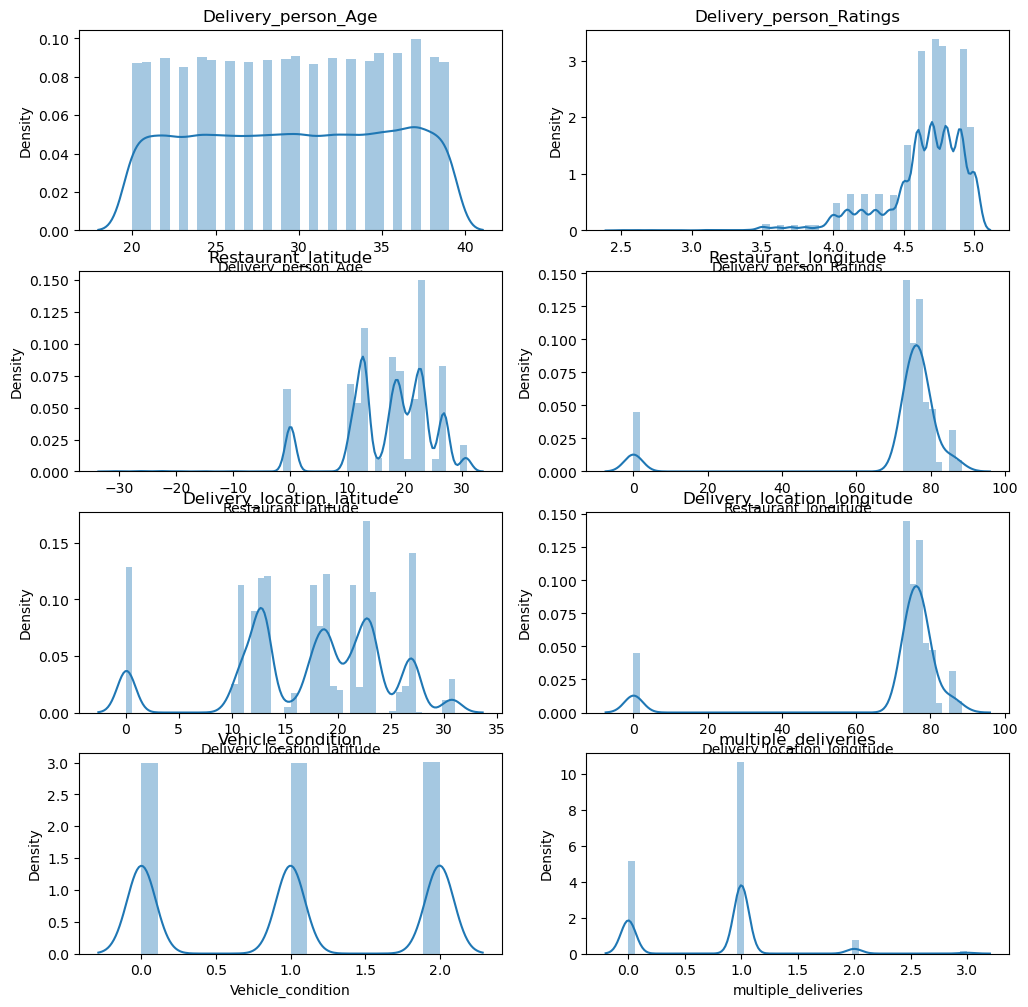

In [1122]:
k=1
plt.tight_layout()
plt.figure(figsize=(12,12))

for i in data.loc[:,num_list1]:
    plt.subplot(4,2,k)
    sns.distplot(data[i])
    plt.title(i)
    k+=1

Metropolitian     33946
Urban              9760
Semi-Urban          156
Name: City, dtype: int64

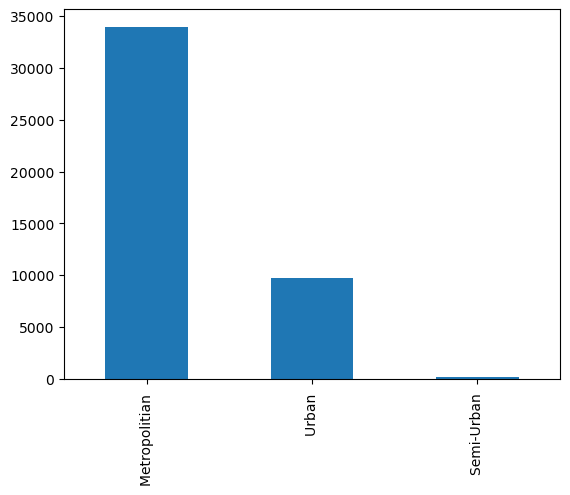

In [1126]:
data['City'].value_counts().plot(kind= 'bar')
data['City'].value_counts()

In [1127]:
import plotly.express as px
fig = px.box(data, 
             x="Type_of_vehicle",
             y="Time_taken(min)", 
             color="Type_of_order")
fig.show()

<Axes: xlabel='Delivery_person_Age', ylabel='Density'>

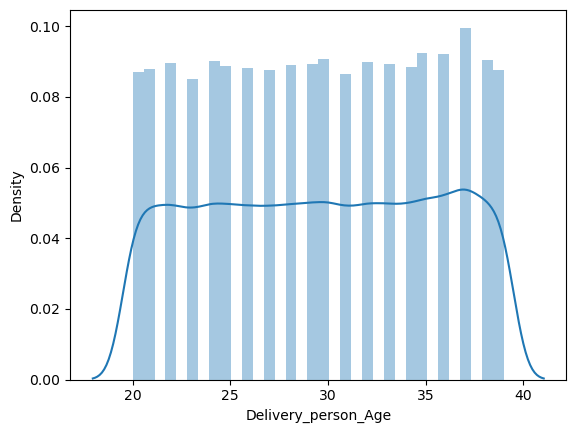

In [1128]:
sns.distplot(data.Delivery_person_Age)

<Axes: xlabel='Delivery_person_Ratings', ylabel='Density'>

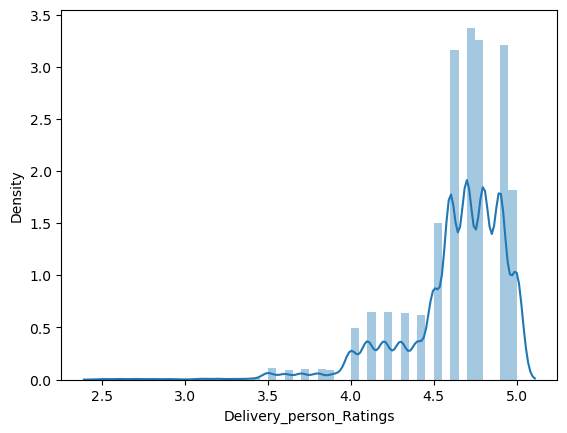

In [1129]:
sns.distplot(data.Delivery_person_Ratings)

array([[<Axes: title={'center': 'Delivery_person_Age'}>,
        <Axes: title={'center': 'Delivery_person_Ratings'}>,
        <Axes: title={'center': 'Restaurant_latitude'}>,
        <Axes: title={'center': 'Restaurant_longitude'}>],
       [<Axes: title={'center': 'Delivery_location_latitude'}>,
        <Axes: title={'center': 'Delivery_location_longitude'}>,
        <Axes: title={'center': 'Vehicle_condition'}>,
        <Axes: title={'center': 'multiple_deliveries'}>],
       [<Axes: title={'center': 'Time_taken(min)'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'order_prepare_time'}>,
        <Axes: title={'center': 'distance'}>, <Axes: >, <Axes: >]],
      dtype=object)

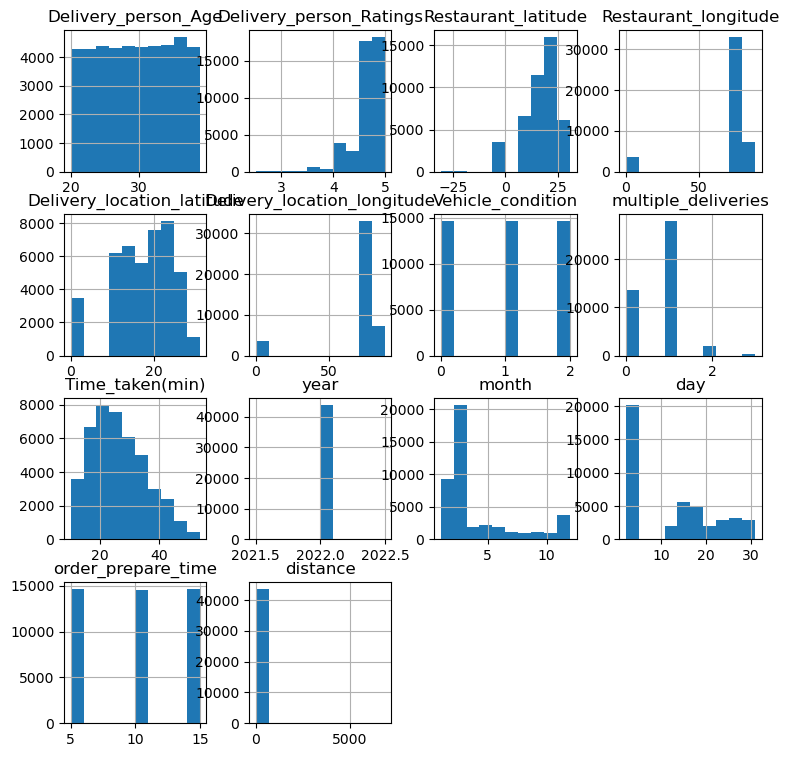

In [1130]:
data.hist(figsize=(9,9))

In [1131]:
data['month'].value_counts()

3     20711
2      7114
5      2223
1      2180
11     2037
6      1873
4      1857
12     1767
9      1121
7      1103
10      953
8       923
Name: month, dtype: int64

<Axes: xlabel='month', ylabel='Time_taken(min)'>

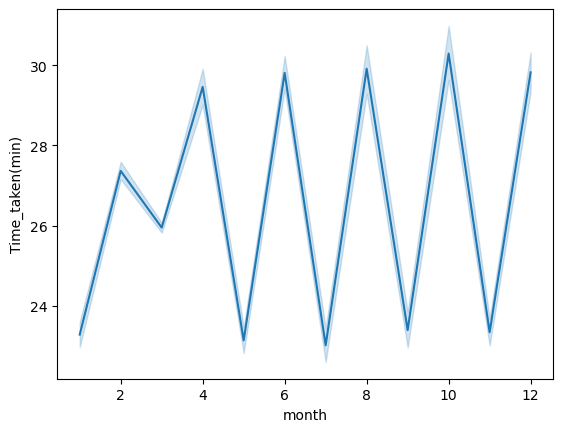

In [1132]:
sns.lineplot(x=data.month,y=data["Time_taken(min)"],data=data)

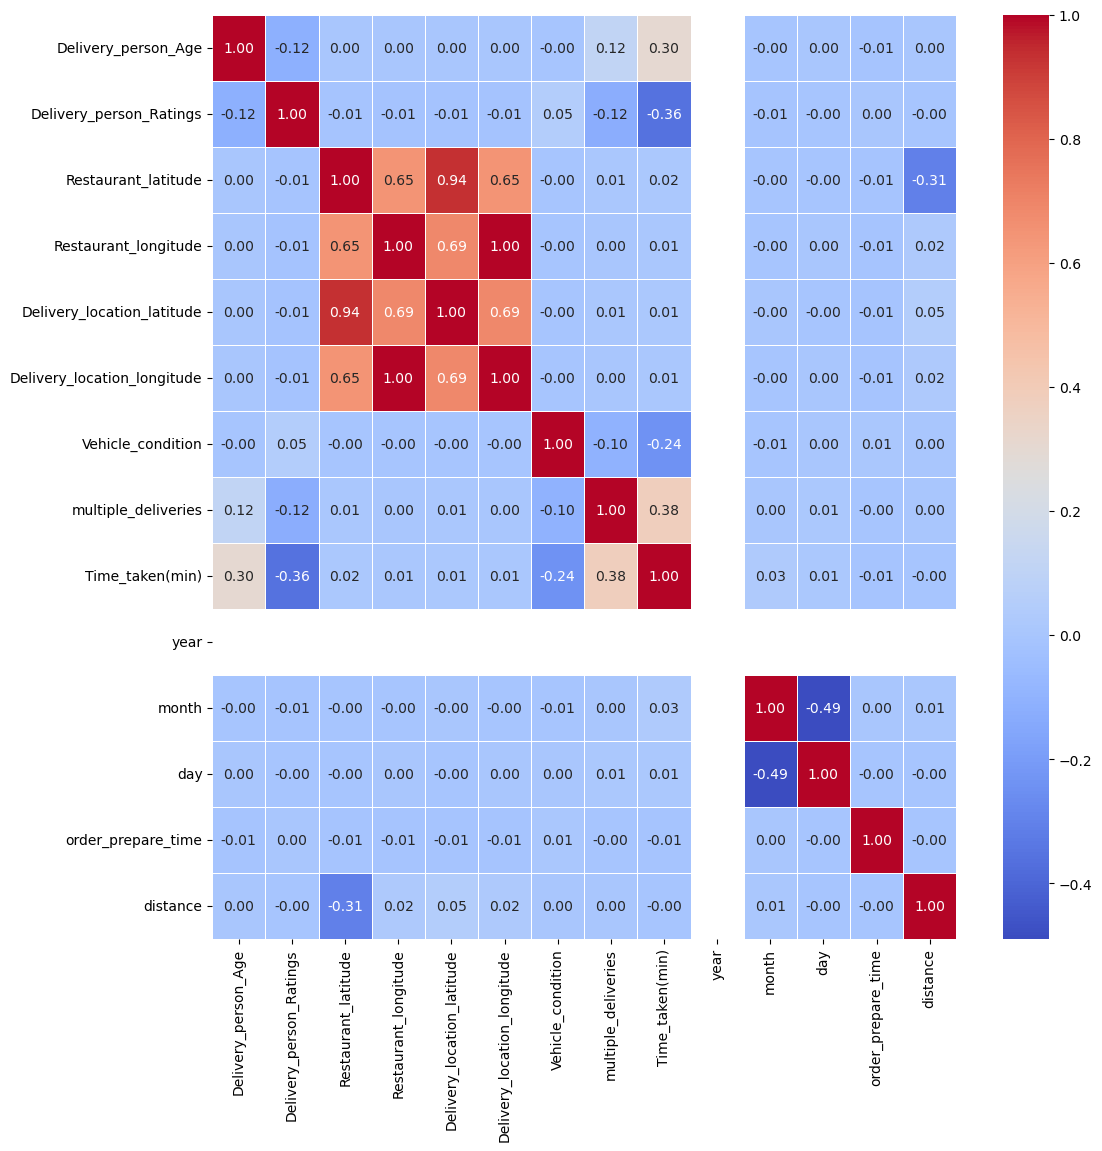

In [1133]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="coolwarm");

In [1134]:
data.corr()["Time_taken(min)"].sort_values(ascending=False)

Time_taken(min)                1.000000
multiple_deliveries            0.379204
Delivery_person_Age            0.302218
month                          0.028792
Restaurant_latitude            0.015252
Delivery_location_latitude     0.014824
day                            0.012149
Delivery_location_longitude    0.008668
Restaurant_longitude           0.008110
distance                      -0.001599
order_prepare_time            -0.008478
Vehicle_condition             -0.243111
Delivery_person_Ratings       -0.359726
year                                NaN
Name: Time_taken(min), dtype: float64

In [1135]:
cor=data.corr()["Time_taken(min)"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with Time_taken":cor.values})

,column,Correlation with Time_taken
0,Time_taken(min),1.000000
1,multiple_deliveries,0.379204
2,Delivery_person_Age,0.302218
3,month,0.028792
4,Restaurant_latitude,0.015252
5,Delivery_location_latitude,0.014824
6,day,0.012149
7,Delivery_location_longitude,0.008668
8,Restaurant_longitude,0.008110
9,distance,-0.001599


# Encoding the independent variables

In [1137]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False , dtype='int32')
city_enc=ohe.fit_transform(data[['City']])
city_df=pd.DataFrame(city_enc,columns=ohe.get_feature_names_out(['City']))
#--------------------------------------------------------------------------------------------------------------------------
citycode_enc=ohe.fit_transform(data[['City_code']])
citycode_df=pd.DataFrame(citycode_enc,columns=ohe.get_feature_names_out(['City_code']))
#--------------------------------------------------------------------------------------------------------------------------
fest_enc=ohe.fit_transform(data[['Festival']])
fest_df=pd.DataFrame(fest_enc,columns=ohe.get_feature_names_out(['Festival']))
#--------------------------------------------------------------------------------------------------------------------------
tov_enc=ohe.fit_transform(data[['Type_of_vehicle']])
tov_df=pd.DataFrame(tov_enc,columns=ohe.get_feature_names_out(['Type_of_vehicle']))
#---------------------------------------------------------------------------------------------------------------------------
too_enc=ohe.fit_transform(data[['Type_of_order']])
too_df=pd.DataFrame(too_enc,columns=ohe.get_feature_names_out(['Type_of_order']))
#----------------------------------------------------------------------------------------------------------------------------
rtd_enc=ohe.fit_transform(data[['Road_traffic_density']])
rtd_df=pd.DataFrame(rtd_enc,columns=ohe.get_feature_names_out(['Road_traffic_density']))
#----------------------------------------------------------------------------------------------------------------------------
wc_enc=ohe.fit_transform(data[['Weatherconditions']])
wc_df=pd.DataFrame(wc_enc,columns=ohe.get_feature_names_out(['Weatherconditions']))

In [1138]:
result_df = pd.concat([data.reset_index(drop=True), city_df.reset_index(drop=True),citycode_df.reset_index(drop=True),
                       fest_df.reset_index(drop=True),tov_df.reset_index(drop=True),too_df.reset_index(drop=True),
                       rtd_df.reset_index(drop=True),wc_df.reset_index(drop=True)], axis=1)

In [1139]:
result_df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Road_traffic_density_High,Road_traffic_density_Jam,Road_traffic_density_Low,Road_traffic_density_Medium,Weatherconditions_ Cloudy,Weatherconditions_ Fog,Weatherconditions_ Sandstorms,Weatherconditions_ Stormy,Weatherconditions_ Sunny,Weatherconditions_ Windy
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,1,0,0,0,0,0,0,0,1,0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,0,1,0,0,0,0,0,1,0,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,0,0,1,0,0,0,1,0,0,0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,0,0,0,1,0,0,0,0,1,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43857,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,Meal,...,1,0,0,0,0,0,0,0,0,1
43858,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,Buffet,...,0,1,0,0,0,0,0,0,0,1
43859,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,Drinks,...,0,0,1,0,1,0,0,0,0,0
43860,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,Snack,...,1,0,0,0,1,0,0,0,0,0


In [1140]:
result_df=result_df.drop(['Weatherconditions','Road_traffic_density','Type_of_order','Type_of_vehicle','Festival',
                          'City','City_code'],axis=1)

# Splitting Data

In [1141]:
from sklearn.model_selection import train_test_split

X_train , X_test ,y_train ,y_test=train_test_split(result_df.drop('Time_taken(min)', axis=1),result_df['Time_taken(min)']
                                                   ,test_size=0.2 , random_state=0)

In [1142]:
X_train

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,year,month,...,Road_traffic_density_High,Road_traffic_density_Jam,Road_traffic_density_Low,Road_traffic_density_Medium,Weatherconditions_ Cloudy,Weatherconditions_ Fog,Weatherconditions_ Sandstorms,Weatherconditions_ Stormy,Weatherconditions_ Sunny,Weatherconditions_ Windy
11358,24.0,5.0,12.981615,80.231598,12.991615,80.241598,1,0.0,2022,3,...,0,0,1,0,0,0,0,0,1,0
32725,32.0,4.5,22.308096,73.167753,22.378096,73.237753,1,0.0,2022,3,...,0,1,0,0,0,0,0,0,0,1
33699,20.0,2.6,21.170798,72.790489,21.250798,72.870489,2,1.0,2022,2,...,0,0,1,0,0,0,0,0,1,0
3486,33.0,4.9,12.321214,76.621094,12.351214,76.651094,2,1.0,2022,3,...,0,1,0,0,0,0,0,1,0,0
7020,34.0,4.7,12.316967,76.603067,12.346967,76.633067,2,0.0,2022,3,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,32.0,4.7,23.374878,85.335739,23.504878,85.465739,1,1.0,2022,3,...,0,1,0,0,0,0,1,0,0,0
21243,20.0,4.1,18.563934,73.915367,18.613934,73.965367,0,1.0,2022,3,...,0,0,1,0,0,0,0,0,0,1
42613,27.0,4.2,26.905190,75.810753,27.015190,75.920753,0,1.0,2022,10,...,0,1,0,0,0,0,0,0,0,1
43567,31.0,4.6,22.761226,75.887522,22.871226,75.997522,1,1.0,2022,3,...,0,0,1,0,0,1,0,0,0,0


In [1143]:
y_train

11358    21
32725    33
33699    34
3486     32
7020     18
         ..
30403    26
21243    19
42613    39
43567    29
2732     16
Name: Time_taken(min), Length: 35089, dtype: int64

In [1145]:
print('Shape of X_train :' ,X_train.shape)
print('Shape of X_test :' ,X_test.shape)
print('Shape of y_train :' ,y_train.shape)
print('Shape of y_test :' ,y_test.shape)

Shape of X_train : (35089, 57)
Shape of X_test : (8773, 57)
Shape of y_train : (35089,)
Shape of y_test : (8773,)


In [1157]:
from sklearn.preprocessing import StandardScaler

In [1158]:
sc=StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)


array([[-0.97236784,  0.52479676,  0.50833187, ..., -0.45036816,
        -0.44173457, -0.44725183],
       [ 0.76363578, -0.1120008 , -2.23952262, ..., -0.45036816,
        -0.44173457,  2.23587682],
       [ 1.63163758,  0.20639798, -0.54461201, ..., -0.45036816,
        -0.44173457, -0.44725183],
       ...,
       [ 0.06923433, -1.38559594,  0.16916276, ...,  2.22040562,
        -0.44173457, -0.44725183],
       [ 0.24283469,  1.16159433,  0.51138624, ..., -0.45036816,
        -0.44173457, -0.44725183],
       [ 0.59003541, -0.1120008 , -0.55371989, ..., -0.45036816,
         2.26380291, -0.44725183]])

In [1159]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [1160]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



# Linear Regression

In [1150]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [1151]:
lr_y_pred=lr.predict(X_test)
mae = mean_absolute_error(y_test, lr_y_pred)
mse = mean_squared_error(y_test, lr_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 4.79
Mean Squared Error (MSE): 36.42
Root Mean Squared Error (RMSE): 6.03
R-squared (R2) Score: 0.59


# Decision Tree Regressor 

In [1152]:
dc=DecisionTreeRegressor()
dc.fit(X_train,y_train)
dc_y_pred=dc.predict(X_test)
mae = mean_absolute_error(y_test,dc_y_pred)
mse = mean_squared_error(y_test, dc_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dc_y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))


Mean Absolute Error (MAE): 4.06
Mean Squared Error (MSE): 28.01
Root Mean Squared Error (RMSE): 5.29
R-squared (R2) Score: 0.68


# KNN Regressor

In [1153]:
nn=KNeighborsRegressor()
nn.fit(X_train,y_train)
nn_y_pred=nn.predict(X_test)
mae = mean_absolute_error(y_test,nn_y_pred)
mse = mean_squared_error(y_test, nn_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, nn_y_pred)
print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 6.61
Mean Squared Error (MSE): 69.32
Root Mean Squared Error (RMSE): 8.33
R-squared (R2) Score: 0.21223772576660127


# Random Forest Regressor

In [1154]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_y_pred=rf.predict(X_test)

mae = mean_absolute_error(y_test, rf_y_pred)
mse = mean_squared_error(y_test, rf_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 3.1
Mean Squared Error (MSE): 14.96
Root Mean Squared Error (RMSE): 3.87
R-squared (R2) Score: 0.8300345576518151


# Extreme Gradient Boosting 

In [1155]:

import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=90)

# Fit the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=90, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1156]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred
# # Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 3.11
Mean Squared Error (MSE): 15.04
Root Mean Squared Error (RMSE): 3.88
R-squared (R2) Score: 0.83


# Conclusion
In conclusion, the food delivery prediction model was developed using XGBoost, achieving an impressive R2 score of 0.83. Moving forward, potential enhancements include identifying the best features, conducting additional feature engineering, and exploring other optimization techniques to further improve the model's performance and accuracy. These steps will contribute to fine-tuning the model and unlocking its full potential in predicting food delivery timings accurately.